In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

import scaleogram as scg 
import pywt

# choose default wavelet function for the entire notebook
scg.set_default_wavelet('cmor1-1.5')

## Data

In [2]:
df=pd.read_csv('data/Kirumpaa.csv', sep=';', header=None)
df.columns=['date', 'veetase']
df=df.set_index('date')
df.shape

(4383, 1)

In [3]:
df.head()

,veetase
date,
01.01.2011,79
02.01.2011,79
03.01.2011,78
04.01.2011,77
05.01.2011,76


In [4]:
df.tail()

,veetase
date,
27.12.2022,58
28.12.2022,54
29.12.2022,52
30.12.2022,53
31.12.2022,57


## Norm data

In [5]:
veetase = df.veetase-df.veetase.mean()

## Plot

<Axes: xlabel='date'>

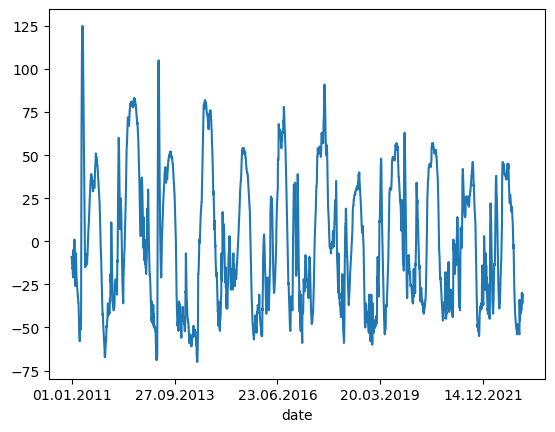

In [6]:
veetase.plot()

<Axes: xlabel='date'>

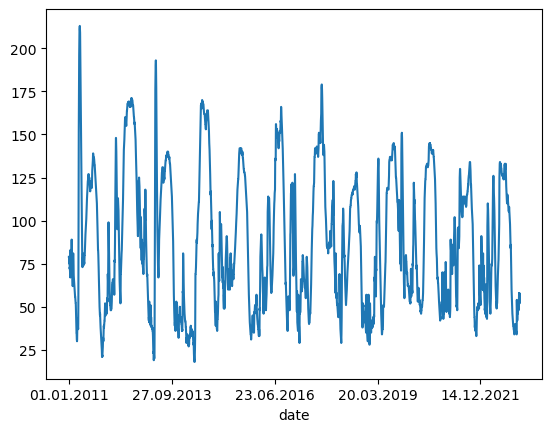

In [7]:
df.veetase.plot()

In [8]:
def set_x_yearly(ax, days, start_year=2011, step=1):
    xlim  = (np.round([0, days]) / 365).astype(np.int32)
    ticks = np.arange(xlim[0], xlim[1], step)
    ax.set_xticks(ticks*365)
    ax.set_xticklabels(start_year + ticks)

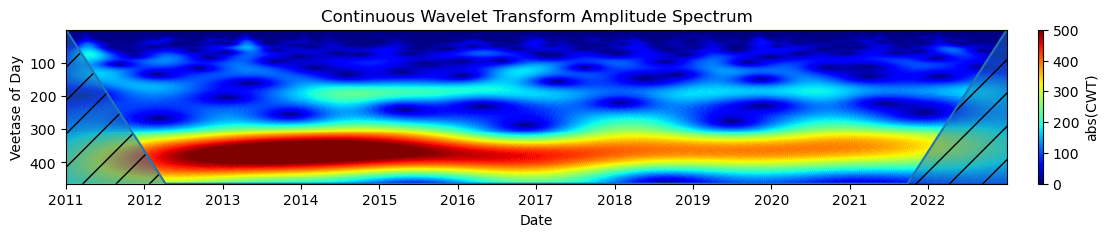

In [9]:
scales = scg.periods2scales(np.arange(1, 365+100, 3))
ax = scg.cws(veetase, figsize=(13.2, 2), scales=scales,
             xlabel="Date", ylabel="Veetase of Day",coikw={'alpha':0.5,'hatch':'/'}, clim=(0, 500))
set_x_yearly(ax, len(veetase))

## Räpina vaatlusjaam

In [10]:
df_rapina=pd.read_csv('data/Rapina.csv', sep=';')
df_rapina.shape

(35972, 2)

In [11]:
df_rapina.head()

,Date,Value[cm]
0,07.07.1924,90
1,08.07.1924,93
2,09.07.1924,91
3,10.07.1924,90
4,11.07.1924,87


In [12]:
df_rapina.tail()

,Date,Value[cm]
35967,27.12.2022,7
35968,28.12.2022,8
35969,29.12.2022,2
35970,30.12.2022,9
35971,31.12.2022,3


In [13]:
df_rapina=df_rapina.set_index('Date')
# df_rapina=df_rapina.head(5000)

In [14]:
df_rapina['veetase']=df_rapina['Value[cm]'].replace({'---':np.nan})
df_rapina['veetase']=df_rapina.veetase.fillna(method='ffill').astype(int)

In [15]:
df_rapina['veetase'].astype(int)

Date
07.07.1924    90
08.07.1924    93
09.07.1924    91
10.07.1924    90
11.07.1924    87
              ..
27.12.2022     7
28.12.2022     8
29.12.2022     2
30.12.2022     9
31.12.2022     3
Name: veetase, Length: 35972, dtype: int32

In [16]:
veetase_rapina = df_rapina.veetase-df_rapina.veetase.mean()

<Axes: xlabel='Date'>

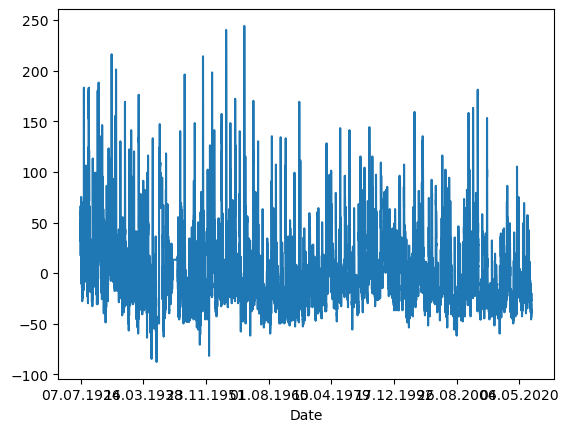

In [17]:
veetase_rapina.plot()

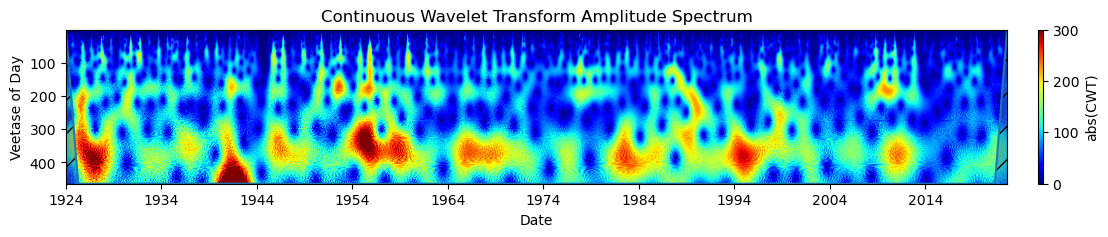

In [18]:
scales = scg.periods2scales(np.arange(1, 365+100, 3))
ax = scg.cws(veetase_rapina, figsize=(13.2, 2), scales=scales,
             xlabel="Date", ylabel="Veetase of Day",coikw={'alpha':0.5,'hatch':'/'},
            clim=(0, 300))
set_x_yearly(ax, len(veetase_rapina), start_year=1924, step=10)

## Vooluhulk Räpina

In [19]:
text=Path('data/vooluhulk_Rapina.csv').read_text()

In [20]:
lines=text.split('\n')

In [21]:
len(lines)

23470

In [22]:
lines_split=[l.replace(',','.').split(';') for l in lines]

In [23]:
df_vool_r=pd.DataFrame(lines_split[1:])
df_vool_r.columns=['date', 'vooluhulk']
df_vool_r.shape

(23469, 2)

In [24]:
df_vool_r.head()

,date,vooluhulk
0,01.10.1958,4.70
1,02.10.1958,4.50
2,03.10.1958,4.50
3,04.10.1958,4.50
4,05.10.1958,4.50


In [25]:
df_vool_r['vooluhulk']=df_vool_r.vooluhulk.ffill().astype(float)

In [26]:
df_vool_r['vooluhulk'].describe()

count    23469.000000
mean         8.109738
std          5.442288
min          0.260000
25%          4.560000
50%          6.430000
75%          9.860000
max         93.000000
Name: vooluhulk, dtype: float64

<Axes: >

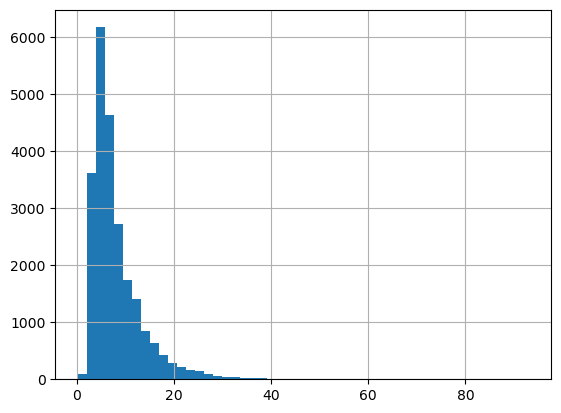

In [27]:
df_vool_r['vooluhulk'].hist(bins=50)

In [28]:
vool_r = df_vool_r.vooluhulk-df_vool_r.vooluhulk.mean()

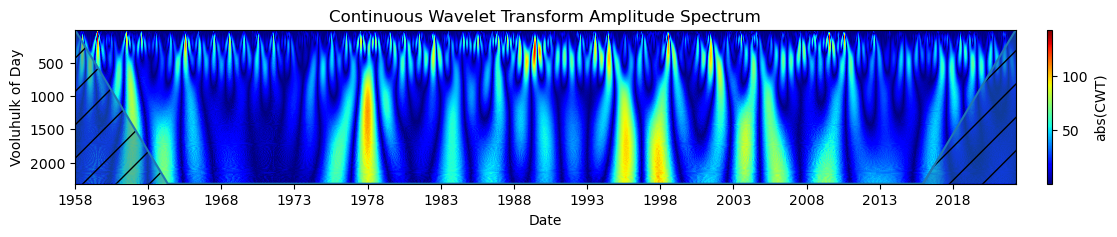

In [29]:
scales = scg.periods2scales(np.arange(1, 365+100, 3))
ax = scg.cws(vool_r, figsize=(13.2, 2), scales=scales, wavelet='gaus2',
             xlabel="Date", ylabel="Vooluhulk of Day",coikw={'alpha':0.5,'hatch':'/'},
           )
set_x_yearly(ax, len(vool_r), start_year=1958, step=5)

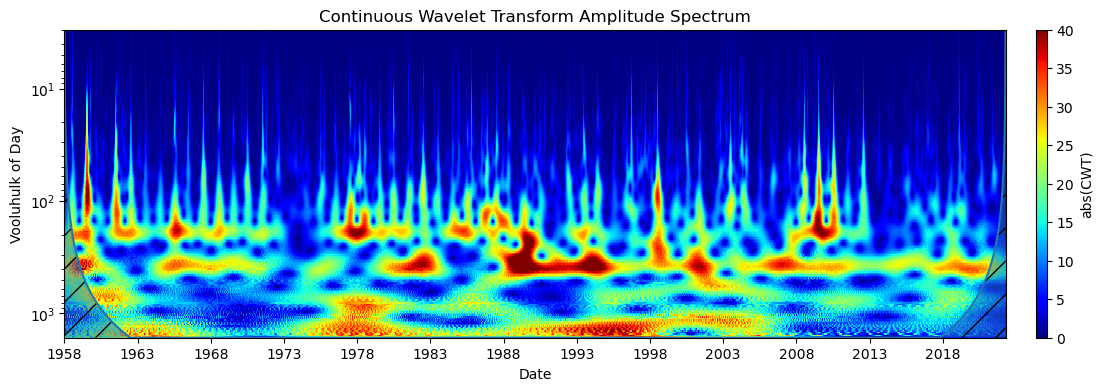

In [30]:
# use logaritmic spaced scales values when using log-Y-axis :-)
scales = scg.periods2scales(np.logspace(np.log10(2), np.log10(365*3), 200))

cwt = scg.CWT(vool_r, scales=scales, wavelet='cmor1.5-1.0') 

ax  = scg.cws(cwt, figsize=(13.2, 4), xlabel="Date", ylabel="Vooluhulk of Day", 
              yscale='log', coikw={'alpha':0.5,'hatch':'/'},  clim=(0, 40))
set_x_yearly(ax, len(vool_r),  start_year=1958, step=5)

## Riigikogu stenod

In [31]:
df_riigikogu=pd.read_csv('data/stenos_cleaned_faction.csv')
df_riigikogu.shape

(209949, 17)

In [32]:
df_riigikogu.head()

,heading,speaker,link_video,link_steno,index_pk,index_snd,text,year,month,day,time,seconds_from_start,video_link_wo_time,text_wo_punct,date,koosseis,fation
0,10:00 Istungi rakendamine,Aseesimees Siim Kallas,https://www.youtube.com/watch?v=GaFL2Zc4OMg&t=0,https://stenogrammid.riigikogu.ee/201911191000,PKP-25040,SND-559399,"Auväärt kolleegid, auväärt Riigikogu, tere hom...",2019,11,19,10:00,0,https://www.youtube.com/watch?v=GaFL2Zc4OMg,auväärt kolleegid auväärt riigikogu tere hommi...,2019-11-19,xiv,NaN
1,1.\n 10:02 Eesti Keske...,Aseesimees Siim Kallas,https://www.youtube.com/watch?v=GaFL2Zc4OMg&t=125,https://stenogrammid.riigikogu.ee/201911191000,PKP-25041,SND-559400,Täna on meil päevakorras olulise tähtsusega ri...,2019,11,19,10:02,125,https://www.youtube.com/watch?v=GaFL2Zc4OMg,täna on meil päevakorras olulise tähtsusega ri...,2019-11-19,xiv,NaN
2,1.\n 10:02 Eesti Keske...,Kersti Sarapuu,https://www.youtube.com/watch?v=GaFL2Zc4OMg&t=238,https://stenogrammid.riigikogu.ee/201911191000,PKP-25041,SND-559401,Lugupeetud istungi juhataja! Head kolleegid ja...,2019,11,19,10:02,238,https://www.youtube.com/watch?v=GaFL2Zc4OMg,lugupeetud istungi juhataja head kolleegid ja ...,2019-11-19,xiv,Eesti Keskerakonna fraktsioon
3,1.\n 10:02 Eesti Keske...,Aseesimees Siim Kallas,https://www.youtube.com/watch?v=GaFL2Zc4OMg&t=...,https://stenogrammid.riigikogu.ee/201911191000,PKP-25041,SND-559402,"Aitäh! Ettekandjatele ütlen niipalju, et selle...",2019,11,19,10:02,1194,https://www.youtube.com/watch?v=GaFL2Zc4OMg,aitäh ettekandjatele ütlen niipalju et selles ...,2019-11-19,xiv,NaN
4,1.\n 10:02 Eesti Keske...,Aivar Sõerd,https://www.youtube.com/watch?v=GaFL2Zc4OMg&t=...,https://stenogrammid.riigikogu.ee/201911191000,PKP-25041,SND-559403,"Aitäh, austatud juhataja! Austatud ettekandja!...",2019,11,19,10:02,1231,https://www.youtube.com/watch?v=GaFL2Zc4OMg,aitäh austatud juhataja austatud ettekandja ei...,2019-11-19,xiv,Eesti Reformierakonna fraktsioon


<Axes: >

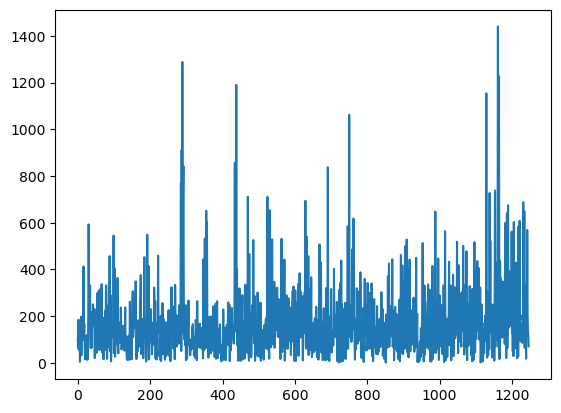

In [33]:
df_segment_count=df_riigikogu.groupby(['year', 'month', 'day'])['index_snd'].count().reset_index()
df_segment_count['index_snd'].plot()

In [34]:
df_segment_count['time']=df_segment_count.year.astype(str)+'-'+df_segment_count.month.astype(str)+'-'+df_segment_count.day.astype(str)
df_segment_count_sub=df_segment_count[['time', 'index_snd']]
df_segment_count_sub=df_segment_count_sub.set_index(df_segment_count_sub.time)

In [35]:
df_segment_count_sub.head()

,time,index_snd
time,,
2010-1-11,2010-1-11,102
2010-1-12,2010-1-12,63
2010-1-13,2010-1-13,185
2010-1-18,2010-1-18,108
2010-1-19,2010-1-19,55


In [36]:
df_segment_count_sub.tail()

,time,index_snd
time,,
2022-6-1,2022-6-1,569
2022-6-2,2022-6-2,208
2022-6-7,2022-6-7,142
2022-6-8,2022-6-8,116
2022-6-9,2022-6-9,71


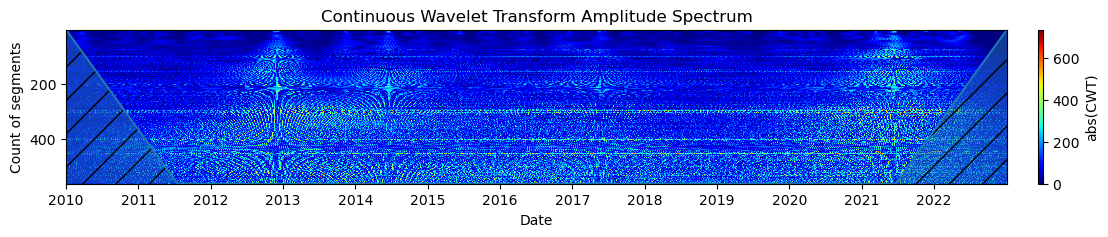

In [37]:
rk_segment_count_sub = df_segment_count_sub.index_snd-df_segment_count_sub.index_snd.mean()
rk_segment_count_sub.index = pd.DatetimeIndex(rk_segment_count_sub.index)

idx = pd.date_range('2010-1-1', '2022-12-31')
rk_segment_count_sub = rk_segment_count_sub.reindex(idx, fill_value=0)

scales = scg.periods2scales(np.arange(1, 365+200, 3))
ax = scg.cws(rk_segment_count_sub, figsize=(13.2, 2), scales=scales,
             xlabel="Date", ylabel="Count of segments",coikw={'alpha':0.5,'hatch':'/'})
set_x_yearly(ax, len(rk_segment_count_sub), start_year=2010)

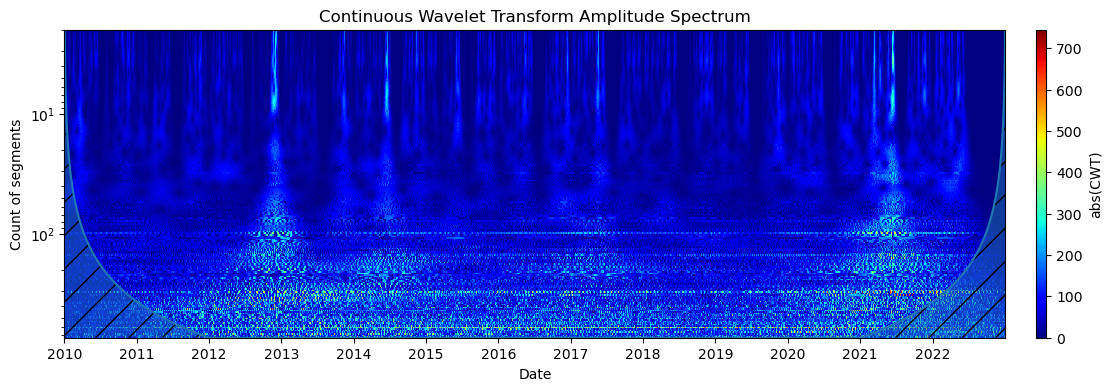

In [38]:
scales = scg.periods2scales(np.logspace(np.log10(2), np.log10(365*2), 200))

cwt = scg.CWT(rk_segment_count_sub, scales=scales) 

ax  = scg.cws(cwt, figsize=(13.2, 4), xlabel="Date", ylabel="Count of segments", 
              yscale='log', coikw={'alpha':0.5,'hatch':'/'})
set_x_yearly(ax, len(rk_segment_count_sub),  start_year=2010, step=1)

## Count per week

In [88]:
#count per day
df_segment_count=df_riigikogu.groupby(['year', 'month', 'day'])['index_snd'].count().reset_index()
df_segment_count['time']=df_segment_count.year.astype(str)+'-'+df_segment_count.month.astype(str)+'-'+df_segment_count.day.astype(str)

df_segment_count_sub=df_segment_count[['time', 'index_snd']]
df_segment_count_sub=df_segment_count_sub.set_index(df_segment_count_sub.time)
df_segment_count_sub.index = pd.DatetimeIndex(df_segment_count_sub.index)
#add missing days
idx = pd.date_range('2010-1-1', '2022-12-31')
df_segment_count_sub = df_segment_count_sub.reindex(idx, fill_value=0)
#index set as year-week
df_segment_count_sub.index = df_segment_count_sub.index.strftime('%Y-%U')

In [90]:
#count per year-week sum
df_segment_count_sub_w = df_segment_count_sub.groupby(rk_segment_count_sub.index).sum()
df_segment_count_sub_w=df_segment_count_sub_w.index_snd-df_segment_count_sub_w.index_snd.mean()
df_segment_count_sub_w.head()

C:\Users\RistoHinno\AppData\Local\Temp\ipykernel_23564\4239074090.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_segment_count_sub_w = df_segment_count_sub.groupby(rk_segment_count_sub.index).sum()


2010-00   -304.71553
2010-01   -304.71553
2010-02     45.28447
2010-03     -3.71553
2010-04    127.28447
Name: index_snd, dtype: float64

<Axes: >

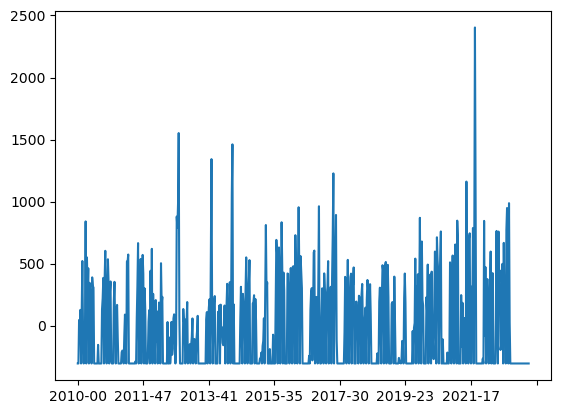

In [92]:
df_segment_count_sub_w.plot()

In [107]:
def set_x_weekly(ax, weeks, start_year=2011, step=1):
    xlim  = (np.round([0, weeks]) / 53).astype(np.int32)
    ticks = np.arange(xlim[0], xlim[1], step)
    ax.set_xticks(ticks*53)
    ax.set_xticklabels(start_year + ticks)

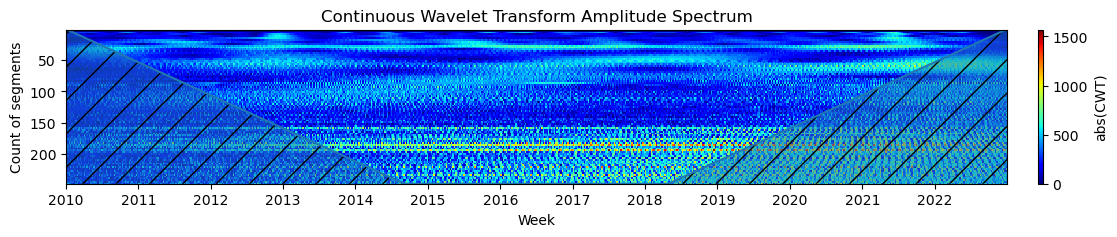

In [108]:
scales = scg.periods2scales(np.arange(1, 50+200, 3))
ax = scg.cws(df_segment_count_sub_w, figsize=(13.2, 2), scales=scales,
             xlabel="Week", ylabel="Count of segments",coikw={'alpha':0.5,'hatch':'/'})
set_x_weekly(ax, len(df_segment_count_sub_w), start_year=2010)

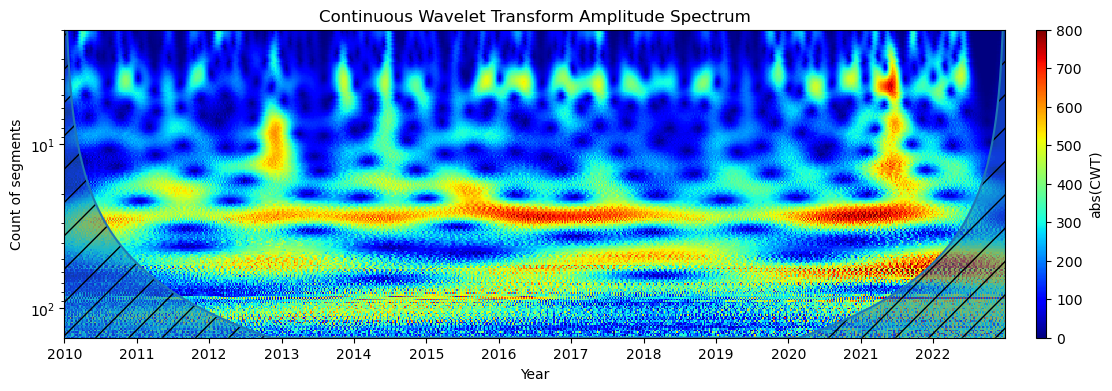

In [119]:
scales = scg.periods2scales(np.logspace(np.log10(2), np.log10(50*3), 200))
cwt = scg.CWT(df_segment_count_sub_w, scales=scales) 

ax  = scg.cws(cwt, figsize=(13.2, 4), xlabel="Year", ylabel="Count of segments", 
              yscale='log', coikw={'alpha':0.5,'hatch':'/'}, clim=(0, 800))
set_x_weekly(ax, len(df_segment_count_sub_w), start_year=2010)